In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import simple_hopfield_model as shm
from simple_hopfield_model import Hopfield
from simple_hopfield_model import feedforward_matrix
from sklearn.decomposition import PCA
torch.manual_seed(1) 



In [14]:
# Initialize parameters
n_neurons = 1000  # Number of neurons
n_states = 100  # Number of stable training states ( will need to generate more specific code for this)

# Initialize the Hopfield network
hopfield_net = Hopfield(n_neurons)

# Generate random training states and train the network
hopfield_net.create_matrix_static(n_states)


In [18]:
num_test_samples = 25  # Number of test samples to generate
test_samples = [torch.randint(0, 2, size=(n_neurons,)) for _ in range(num_test_samples)]
for i, sample in enumerate(test_samples):
    test_samples[i][test_samples[i] == 0] = -1

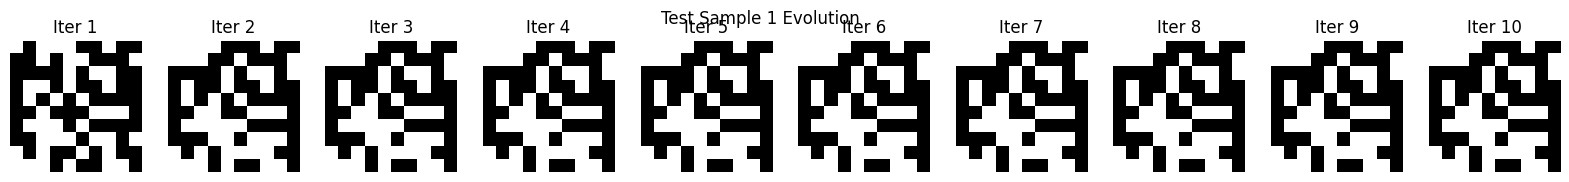

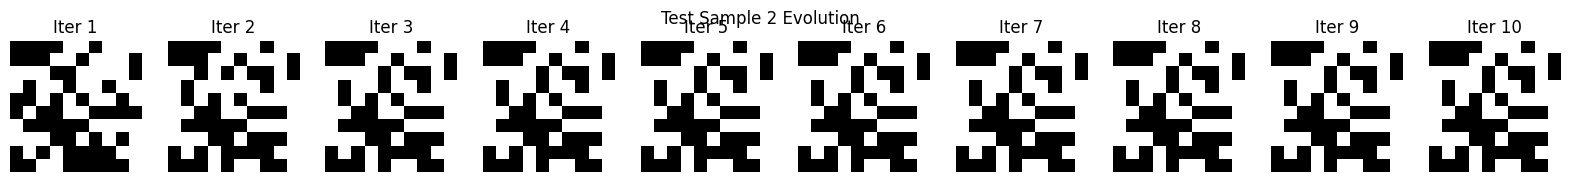

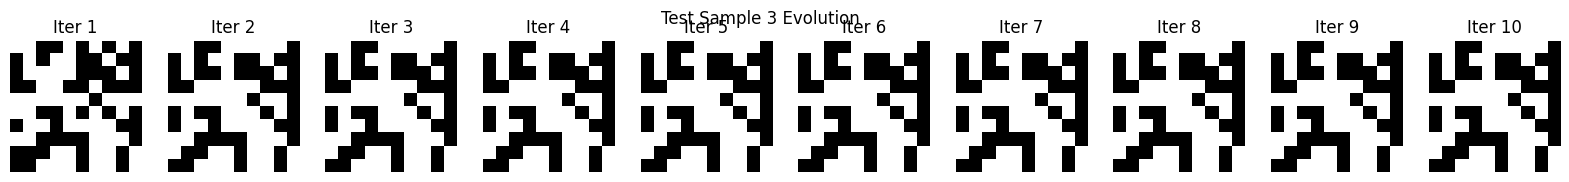

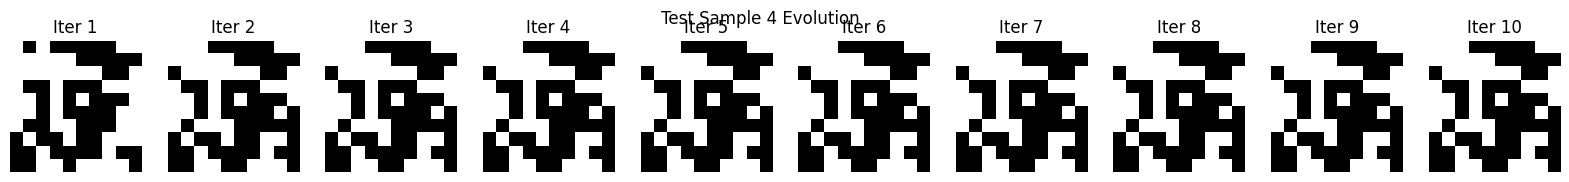

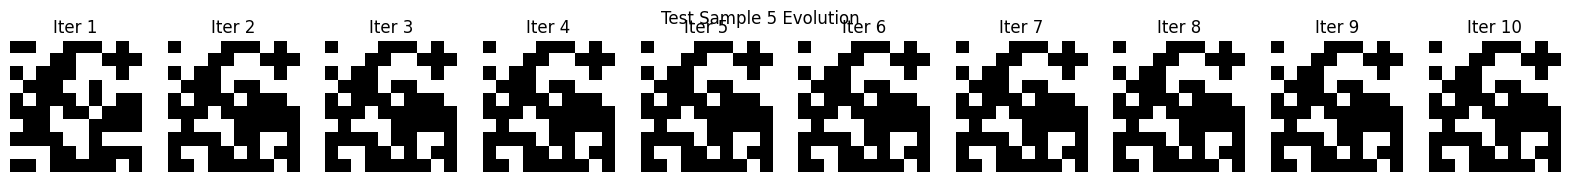

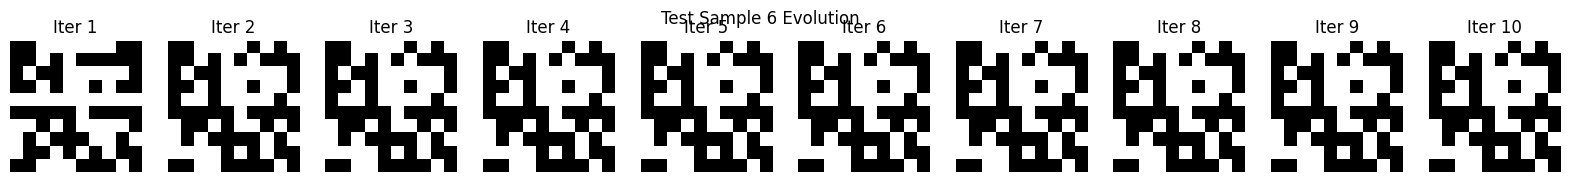

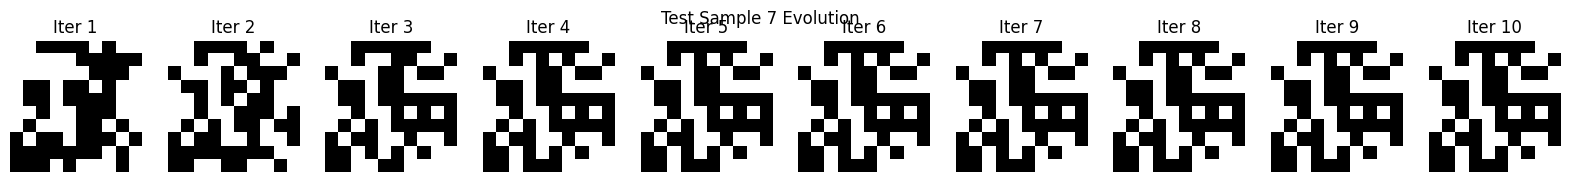

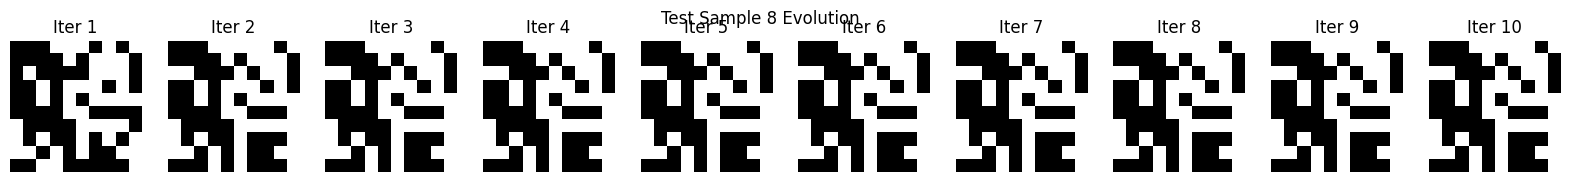

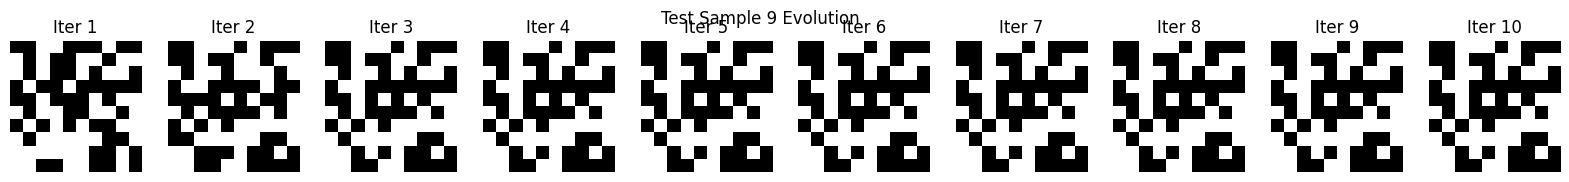

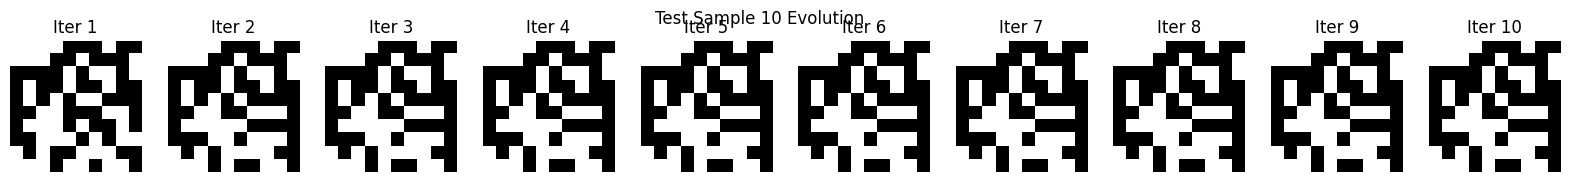

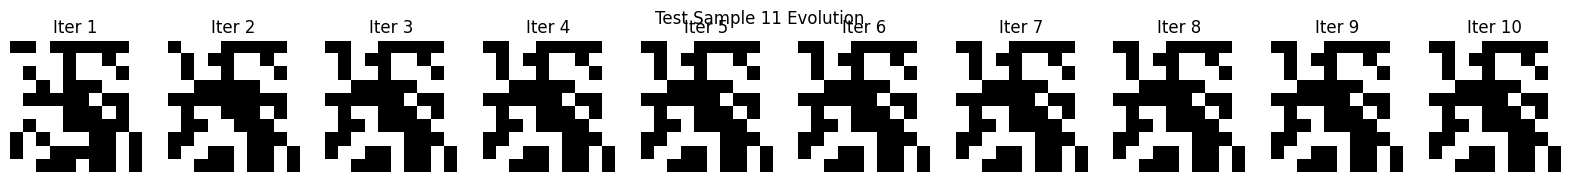

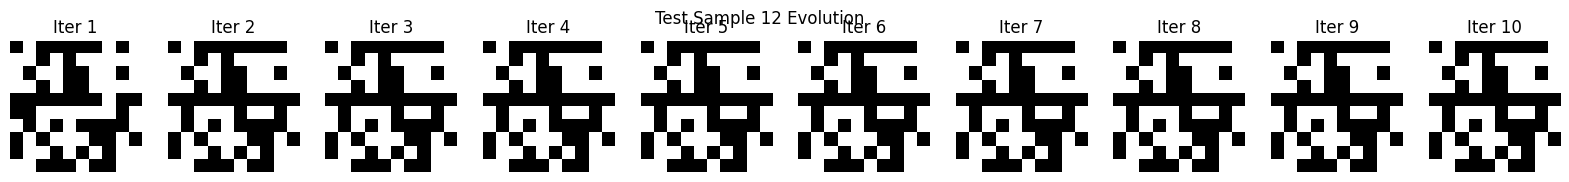

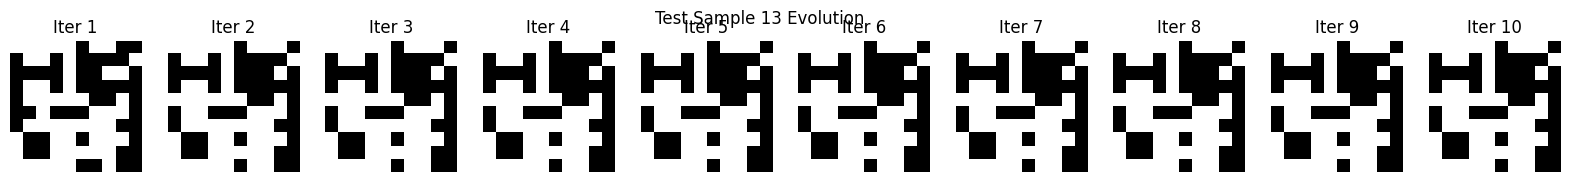

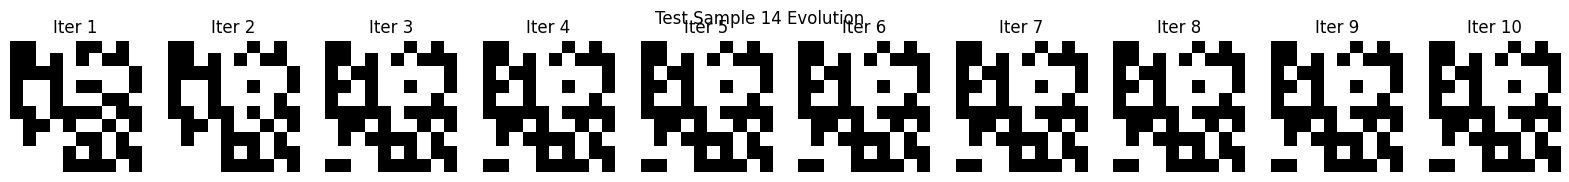

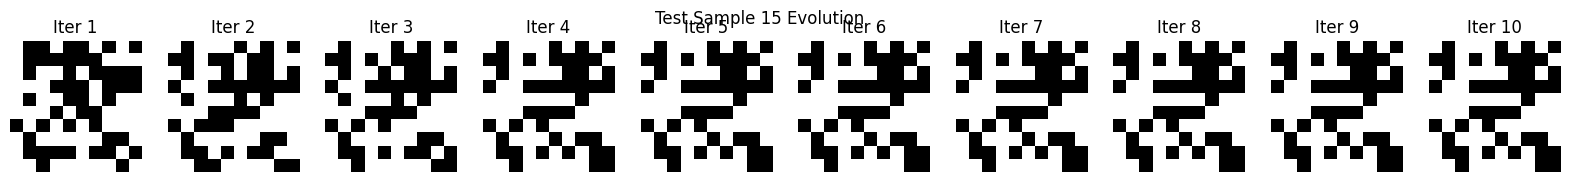

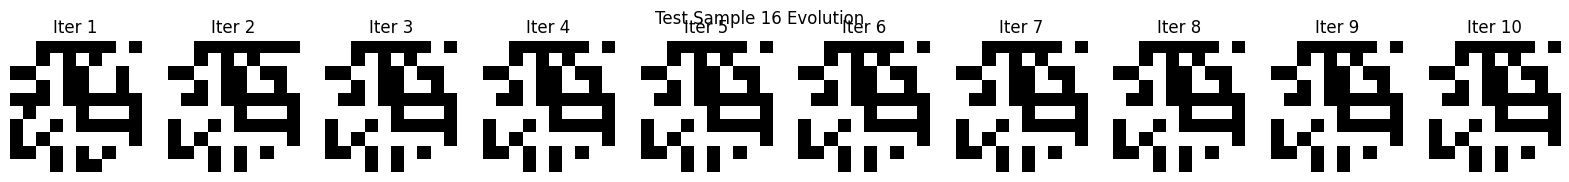

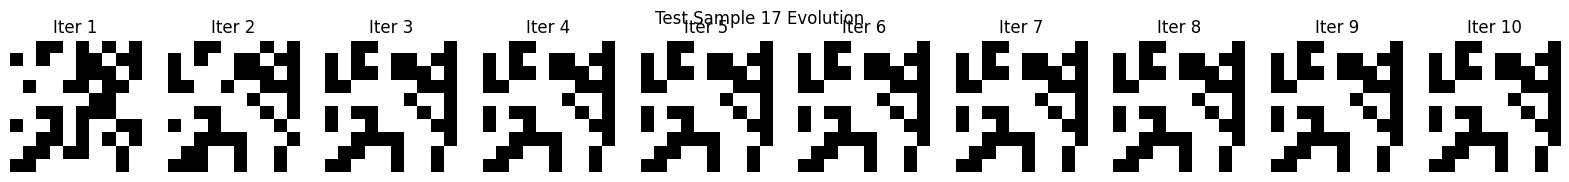

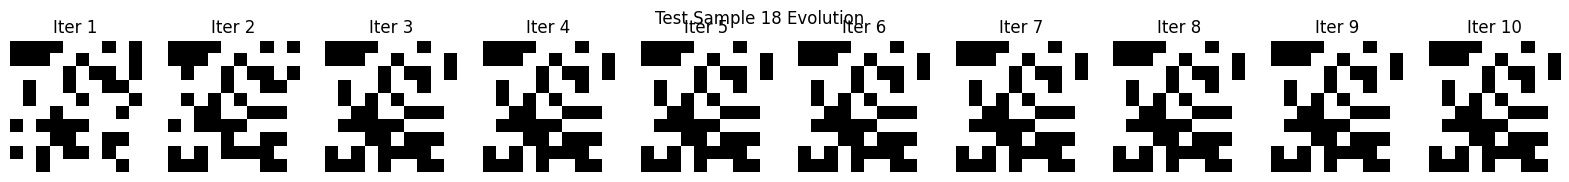

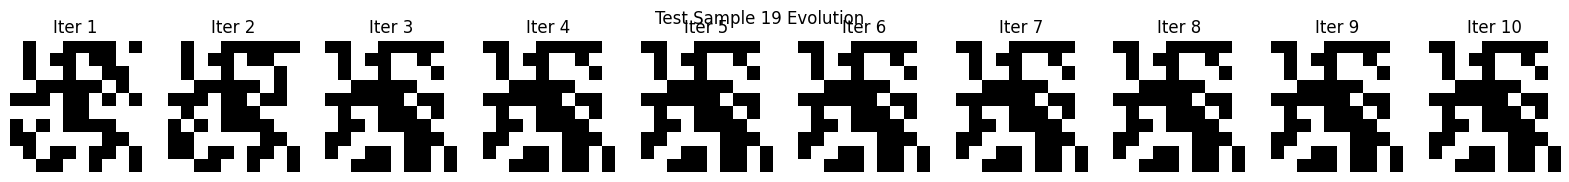

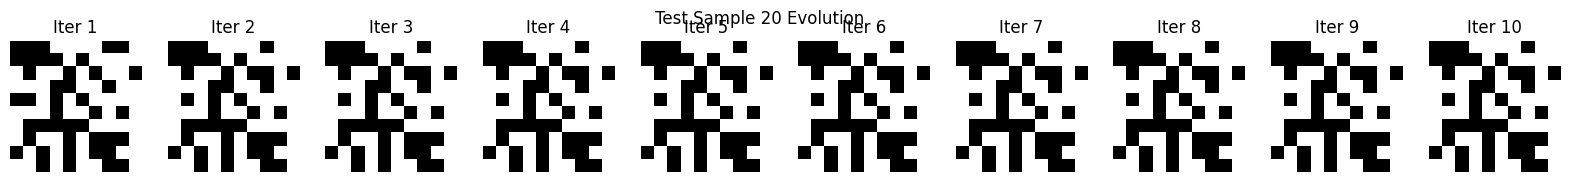

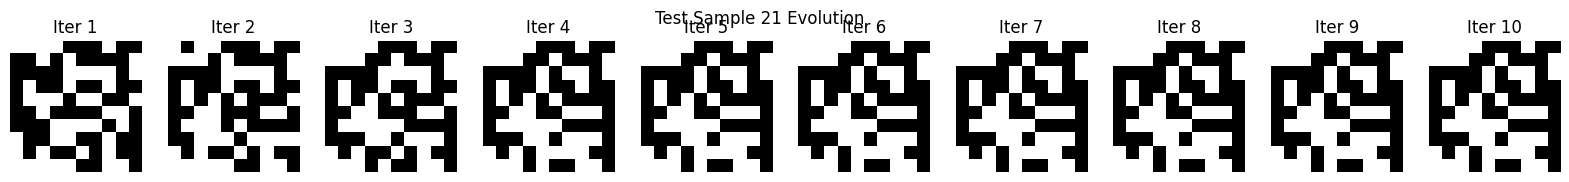

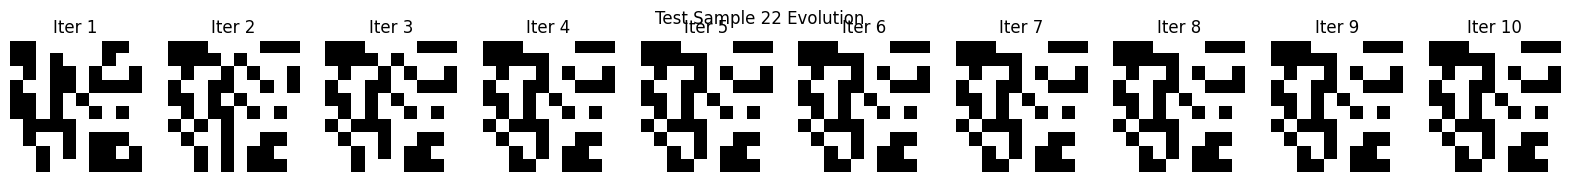

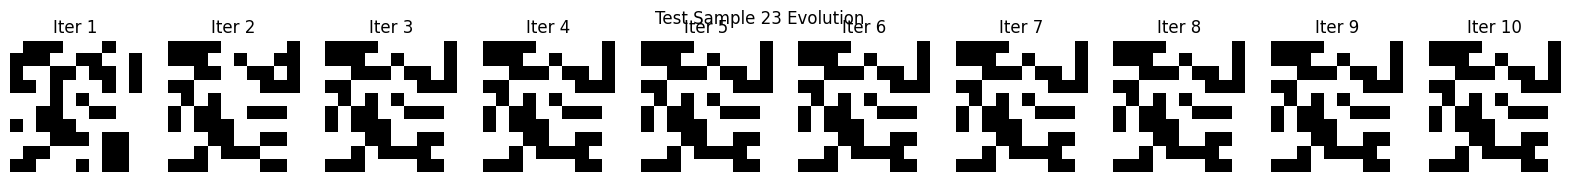

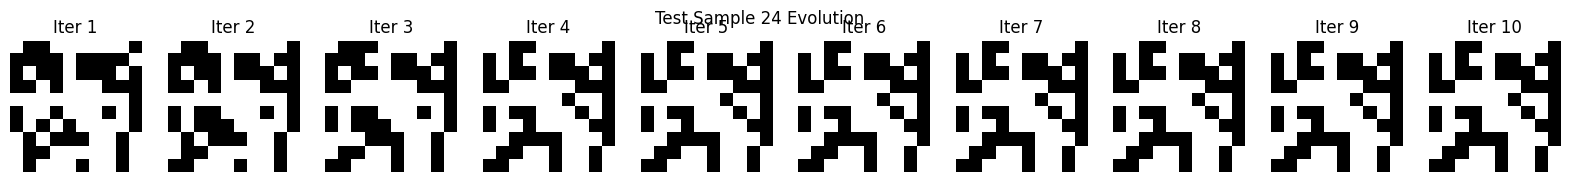

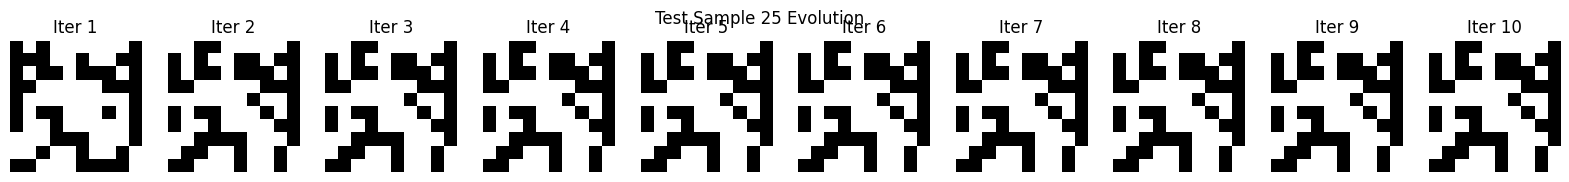

In [19]:
# Define the number of iterations to visualize
iterations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Process each test sample
for i, test_sample in enumerate(test_samples):
    fig, axs = plt.subplots(1, len(iterations), figsize=(20, 2))
    fig.suptitle(f'Test Sample {i+1} Evolution')

    for j, iteration in enumerate(iterations):
        # Retrieve the pattern from the network
        output_pattern = hopfield_net.retrieve(test_sample.float(), iteration).numpy()

        # Visualize the pattern
        axs[j].imshow(output_pattern.reshape((10, 10)), cmap='binary')
        axs[j].set_title(f'Iter {iteration}')
        axs[j].axis('off')

    plt.show()

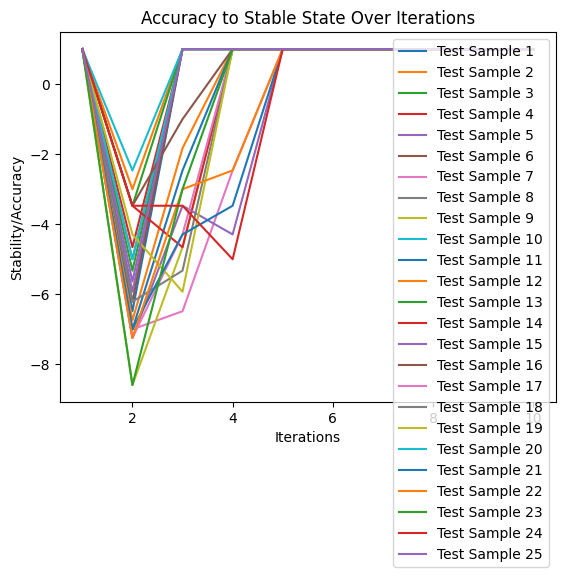

In [20]:
# Number of iterations to track
iterations = range(1, 11)

# Placeholder for storing accuracy/similarity measures for each test sample over iterations
accuracies = []

for test_sample in test_samples:
    sample_accuracies = []
    previous_output = None
    
    for iteration in iterations:
        # Retrieve the pattern from the network after a certain number of iterations
        output_pattern = hopfield_net.retrieve(test_sample.float(), iteration)
        
        # Measure similarity or stability; this part depends on your definition of accuracy
        # Example for stability (change detection):
        if previous_output is not None:
            change = torch.norm(output_pattern - previous_output).item()
            stability_measure = 1 - change  # Example measure, assuming smaller changes mean higher stability
            sample_accuracies.append(stability_measure)
        else:
            # Assuming perfect stability at the first iteration as we have no previous state to compare to
            sample_accuracies.append(1)  # Or set to None if you prefer to start measuring from the second iteration
        
        previous_output = output_pattern
    
    accuracies.append(sample_accuracies)

# Plotting the stability/accuracy for each test sample
for i, sample_accuracies in enumerate(accuracies):
    plt.plot(iterations, sample_accuracies, label=f'Test Sample {i+1}')

plt.xlabel('Iterations')
plt.ylabel('Stability/Accuracy')
plt.title('Accuracy to Stable State Over Iterations')
plt.legend()
plt.show()

In [3]:
feature_input = 50
input_patterns = torch.randn(feature_input)
input_patterns

tensor([-1.5256, -0.7502, -0.6540, -1.6095, -0.1002, -0.6092, -0.9798, -1.6091,
        -0.7121,  0.3037, -0.7773, -0.2515, -0.2223,  1.6871,  0.2284,  0.4676,
        -0.6970, -1.1608,  0.6995,  0.1991,  0.8657,  0.2444, -0.6629,  0.8073,
         1.1017, -0.1759, -2.2456, -1.4465,  0.0612, -0.6177, -0.7981, -0.1316,
         1.8793, -0.0721,  0.0663, -0.4370,  0.7626,  0.4415,  1.1651,  2.0154,
         0.2152, -0.5242, -0.1860, -0.6446,  1.5392, -0.8696, -3.3312, -0.7479,
         1.1173,  0.2981])

In [17]:
n_neurons = 100
# sets up continuous feedforward matrix
def feedforward_matrix(inputs):
        input_dim = feature_input
        output_dim = 2 #(n_neurons / feature_input) 
        weights = torch.randn(output_dim, input_dim)


In [18]:
matrix = feedforward_matrix(inputs = input_patterns)

In [19]:
matrix


In [25]:
# sets up continuous feedforward matrix
def feedforward_matrix(feature_input, n_neurons):
        input_dim = feature_input
        output_dim = int(n_neurons / feature_input)
        weights = torch.randn(output_dim, input_dim)
        return weights
        


In [26]:
feedforward_matrix(feature_input = 100, n_neurons = 1000)

tensor([[ 1.1817e+00, -3.5788e-01, -2.6301e+00, -1.7034e+00,  4.8250e-01,
         -1.0118e+00, -5.2126e-01, -6.6254e-01,  2.8001e-02, -1.2883e+00,
         -1.3608e+00, -1.6181e+00, -6.5837e-01,  1.5646e+00,  1.4422e+00,
         -3.8000e-01,  4.9141e-02, -6.0455e-01, -4.4223e-02,  2.7330e-01,
          1.0976e+00,  1.8590e+00,  5.4741e-01,  1.2244e+00, -8.5364e-01,
         -3.0827e-01,  4.3601e-03, -3.1598e-01,  1.6801e-01, -1.0769e+00,
         -3.3026e-01, -5.6460e-01, -4.0449e-01, -2.3281e-01, -4.6124e-01,
         -6.0877e-01, -3.8642e-01,  3.7721e-01, -6.5040e-02,  1.4367e+00,
         -1.9848e+00,  1.0973e+00,  9.4146e-03, -1.9318e-01, -2.2533e-02,
         -5.2818e-01, -3.2825e-01,  1.2909e+00,  1.8007e+00,  6.6093e-01,
          8.2025e-01, -3.7402e+00, -5.5012e-01,  3.0222e-01, -3.4139e-01,
         -3.0483e-01, -1.9950e+00, -5.3220e-01,  1.1731e-01,  1.9285e+00,
         -3.4261e-01, -9.2323e-01, -1.2061e+00,  9.1004e-02, -1.8591e+00,
          5.6052e-01,  1.0617e+00,  5.

In [3]:
class feedforward_matrix:
    def __init__ (self, feature_input, n_neurons):
        self.feature_input = feature_input
        self.n_neurons = n_neurons
        self.output_dim = n_neurons // feature_input # // is floor division, so returns integer
        self.input_dim = feature_input
        self.Weights = torch.zeros((self.output_dim, self.input_dim))
        
       


    # sets up continuous feedforward matrix
    def update_weights(feature_input, n_neurons):
        input_dim = feature_input
        output_dim = int(n_neurons / feature_input)
        Weights = torch.randn(output_dim, input_dim)
        return Weights



    # Sets up continuous feedforward matrix
    def update_weights(self, feature_input, n_neurons):
        self.input_dim = feature_input
        self.output_dim = n_neurons // feature_input  # Ensure integer result and consistency
        self.Weights = torch.randn((self.output_dim, self.input_dim))
        return self.Weights

In [12]:
def generate_f(f_values):
    return torch.randn(f_values, feature_input)

In [14]:
fs = generate_f(f_values=2)
fs

tensor([[ 4.0285e-01, -6.5861e-01, -8.4923e-01, -4.4019e-03,  1.8889e+00,
          1.1360e+00,  4.6819e-01, -3.0565e-03, -8.8618e-01, -1.2886e+00,
         -5.8437e-01,  1.3254e+00,  1.2077e+00, -5.3342e-01,  8.9794e-02,
          5.0888e-01,  9.1235e-01, -2.0815e+00, -5.4681e-01,  5.3562e-02,
          1.2686e+00, -8.1088e-01, -1.0100e+00,  1.3465e-01, -1.2430e+00,
         -1.0237e+00, -7.0236e-01, -1.6310e-01, -5.5371e-01,  8.2716e-01,
         -2.8648e-01,  3.0830e-01,  3.5949e-01, -3.7788e-01,  2.3066e-01,
          2.4103e-01,  1.7161e+00,  1.0047e+00,  7.3122e-01, -1.6573e+00,
         -3.6367e-01,  6.5354e-01, -1.2872e+00, -5.8933e-01, -3.3999e-01,
          1.1112e+00, -5.3268e-01, -2.5190e-03, -4.3409e-01,  1.1730e+00],
        [-3.3811e-02,  8.7245e-01, -4.3990e-01,  7.2307e-01,  1.3406e+00,
          4.3979e-01, -1.1559e+00,  6.9682e-02, -6.2344e-01,  5.0006e-02,
          4.4003e-02, -7.8673e-01,  4.0209e-01,  3.4525e-01,  6.2772e-01,
          8.3793e-01,  9.4652e-02, -2